In [248]:
include("../code/sp.jl")
include("../code/matrix_generator.jl")
include("../code/slim_graphs.jl")
include("../code/bp.jl")
using ProgressMeter, StaticArrays, OffsetArrays, Statistics

In [249]:
callback(t, ε, sp) = (println("$t $ε"); false)

function decimate!(sp, indep; decsteps=1, callback=callback)
    H = sp.H
    freevars = copy(indep)
    iteration!(sp, maxiter=700, tol=1e-5, callback=callback, damp=0.5)
    while !isempty(freevars)
        iteration!(sp, maxiter=150, tol=1e-3, damp=0.5)
        mag = map(p->p'eachindex(p), sp.survey)
        sort!(freevars, by=i->abs(mag[i]))
        freevars, tofix = freevars[1:end-decsteps], freevars[max(1,end-decsteps+1):end]
        sp.efield[tofix] .= sp.J.*sign.(mag[tofix])
    end
end

decimate! (generic function with 3 methods)

In [250]:
m = factorial(5)
R = 0.25
r = 1 - 3R
n = round(Int, 3m/(2+r))
Λ = OffsetVector([0,0,1-r,r], 0:3)
K = OffsetVector([0,0,0,1], 0:3)
nedges = 3m
# H = copy(fg.H)
H = permutedims(ldpc_matrix(n,m,nedges,Λ,K))
x0 = rand((0,1), size(H,2))
src = (-1).^x0
J = 20
# init=OffsetArray(MVector{2J+1}(fill(1/(2J+1),2J+1)), -J:J)
init=OffsetArray(MVector{2J+1}(rand(2J+1)), -J:J)
y = 0.5
sp = survey_propagation(H; field=src, init, y=y);

In [251]:
B,indep = findbasis_slow(Array(H))
decimate!(sp, indep)

1 0.9981533108648267
2 0.4990005559951787
3 0.2493040871832152
4 0.1267473864802335
5 0.08108718447643173
6 0.10018367562546529
7 0.10402721463013498
8 0.09573146834286313
9 0.08083544486203342
10 0.07537625009394039
11 0.07218242557259846
12 0.07835708246918976
13 0.07582876311309988
14 0.0673609576910973
15 0.06568092842599968
16 0.06363360382280664
17 0.06296697430175911
18 0.06214815406965726
19 0.057288388537327165
20 0.04937020157404089
21 0.04222639829463538
22 0.03387504792702432
23 0.025906780233372423
24 0.02560835575280518
25 0.025298077937781244
26 0.02501417309787024
27 0.024779166646710482
28 0.02534519653888112
29 0.026446359414882242
30 0.027610866951778362
31 0.028691223717491943
32 0.029676741984372673
33 0.03055560982657851
34 0.0313161261716825
35 0.031947813586576
36 0.03244230300972106
37 0.032793959011077733
38 0.03300025158101122
39 0.03306189519801894
40 0.03298278130774607
41 0.03305852587673447
42 0.033227906207755065
43 0.03327470506560415
44 0.0332047828398

350 0.004369820389048262
351 0.00436841941772903
352 0.004402290546440979
353 0.004656554203705865
354 0.004900071944841211
355 0.00513256398899109
356 0.005353729609992031
357 0.005563247951452632
358 0.005760779623550927
359 0.005945969058922196
360 0.006118447595174048
361 0.0062778372407307215
362 0.006423755069271175
363 0.0065558181762692125
364 0.006673649119534497
365 0.006776881754563868
366 0.006865167365378733
367 0.006938180982731579
368 0.0069956277744901985
369 0.0070372493879419795
370 0.007062830120990127
371 0.0070722027988969205
372 0.007065254235512297
373 0.00704193016283694
374 0.007002239520276787
375 0.007187593513200419
376 0.0073755469457181255
377 0.007550412107657223
378 0.007711480382018854
379 0.0078580508026182
380 0.007989437022479673
381 0.008104974360070405
382 0.008204026837265954
383 0.008285994119106188
384 0.008350318262904888
385 0.008396490183383787
386 0.008424055741392267
387 0.008432621366645243
388 0.008421859129853937
389 0.008391511186715828

687 0.0012971003843247342
688 0.0013627614811800304
689 0.001425046264965979
690 0.0014838302473150211
691 0.0015389950387678097
692 0.0015904287740399758
693 0.001638026560086825
694 0.0016816909412795122
695 0.001721332375309692
696 0.0017568697128904076
697 0.0017882306739060438
698 0.0018153523124058712
699 0.0018381814627397852
700 0.0018566751592013486
(ss, i) = (1.0999017132823359, 119)
(ss, i) = (1.0994054375938638, 119)
(ss, i) = (1.0989228190052793, 119)
(ss, i) = (1.0984552935385077, 119)
(ss, i) = (1.09800423087378, 119)
(ss, i) = (1.0975709247719103, 119)
(ss, i) = (1.0971565850909946, 119)
(ss, i) = (1.0967623310658698, 119)
(ss, i) = (1.0963891854467962, 119)
(ss, i) = (1.0960380691825242, 119)
(ss, i) = (1.095709796533618, 119)
(ss, i) = (1.095405070717427, 119)
(ss, i) = (1.0951244803230007, 119)
(ss, i) = (1.0948684967461817, 119)
(ss, i) = (1.0946374727952681, 119)
(ss, i) = (1.0944316424588945, 119)
(ss, i) = (1.0942511216707247, 119)
(ss, i) = (1.0940959097930312, 

(ss, i) = (1.0428101283722808, 105)
(ss, i) = (1.0084461993648794, 108)
(ss, i) = (1.022348010330982, 112)
(ss, i) = (1.0022743822992968, 113)
(ss, i) = (1.0285502588433786, 118)
(ss, i) = (1.0125376835656394, 119)
(ss, i) = (1.0827215777150951, 125)
(ss, i) = (1.0154600807914687, 126)
(ss, i) = (1.0039889488583849, 139)
(ss, i) = (1.0648295561338743, 8)
(ss, i) = (1.0012218085485727, 10)
(ss, i) = (1.0062755360081765, 24)
(ss, i) = (1.0046525626650438, 25)
(ss, i) = (1.0983570776245648, 27)
(ss, i) = (1.003048529568278, 28)
(ss, i) = (1.003363768063971, 32)
(ss, i) = (1.0259208319045872, 34)
(ss, i) = (1.039045674260169, 47)
(ss, i) = (1.0159238191793725, 48)
(ss, i) = (1.0017969745339468, 56)
(ss, i) = (1.0147979766270907, 59)
(ss, i) = (1.0091257789836299, 61)
(ss, i) = (1.0277256911366996, 69)
(ss, i) = (1.0286663548392467, 70)
(ss, i) = (1.0486494427207138, 76)
(ss, i) = (1.0061641533921852, 77)
(ss, i) = (1.0220920814400827, 81)
(ss, i) = (1.017129867304666, 88)
(ss, i) = (1.0182

(ss, i) = (1.0037842400851622, 97)
(ss, i) = (1.0174249717499697, 101)
(ss, i) = (1.002659291646067, 102)
(ss, i) = (1.001747893995433, 103)
(ss, i) = (1.0249023408825018, 105)
(ss, i) = (1.0015843119151984, 108)
(ss, i) = (1.0081511946138537, 112)
(ss, i) = (1.0006889466234865, 113)
(ss, i) = (1.0029606961680944, 118)
(ss, i) = (1.0483934049346024, 119)
(ss, i) = (1.0036826703682997, 126)
(ss, i) = (1.0011996239984484, 139)
(ss, i) = (1.0083990487689085, 8)
(ss, i) = (1.000339748478719, 10)
(ss, i) = (1.0095240165188222, 20)
(ss, i) = (1.042245579254978, 22)
(ss, i) = (1.036363210536874, 24)
(ss, i) = (1.0066848101510844, 25)
(ss, i) = (1.0102977673270772, 27)
(ss, i) = (1.0017310233209469, 28)
(ss, i) = (1.0336771899756625, 29)
(ss, i) = (1.009559371572924, 32)
(ss, i) = (1.0516557493843144, 34)
(ss, i) = (1.0286376040026128, 46)
(ss, i) = (1.0050314688740747, 47)
(ss, i) = (1.0001948789590986, 48)
(ss, i) = (1.0008893059300519, 56)
(ss, i) = (1.001722544248221, 59)
(ss, i) = (1.0295

(ss, i) = (1.0047714510339223, 81)
(ss, i) = (1.0981691770411894, 82)
(ss, i) = (1.0215483798468326, 85)
(ss, i) = (1.0281323890458085, 87)
(ss, i) = (1.00153813141691, 89)
(ss, i) = (1.0342429201770933, 96)
(ss, i) = (1.0751616535771744, 97)
(ss, i) = (1.0332431724535684, 101)
(ss, i) = (1.00207124132134, 102)
(ss, i) = (1.0045260576812343, 103)
(ss, i) = (1.0104127947740789, 110)
(ss, i) = (1.04061547869114, 118)
(ss, i) = (1.0137263611642928, 131)
(ss, i) = (1.0377627919076595, 139)
(ss, i) = (1.0234560673982216, 12)
(ss, i) = (1.0806100375713474, 16)
(ss, i) = (1.0004179713941777, 20)
(ss, i) = (1.0151938236142055, 48)
(ss, i) = (1.0389024679420489, 50)
(ss, i) = (1.000678455219741, 65)
(ss, i) = (1.00194210624767, 69)
(ss, i) = (1.0021780494404742, 70)
(ss, i) = (1.0016519737477134, 78)
(ss, i) = (1.0075788357479385, 81)
(ss, i) = (1.0435992079540513, 85)
(ss, i) = (1.023103817083908, 87)
(ss, i) = (1.0016309553834801, 89)
(ss, i) = (1.0289786861381496, 96)
(ss, i) = (1.0639393759

(ss, i) = (1.0996410112371562, 105)
(ss, i) = (1.0824185712355476, 105)
(ss, i) = (1.0692987328397234, 105)
(ss, i) = (1.0596810800519383, 105)
(ss, i) = (1.052948438829088, 105)
(ss, i) = (1.092334469271545, 112)
(ss, i) = (1.0485116382425672, 105)
(ss, i) = (1.0787321354985444, 112)
(ss, i) = (1.045827810537114, 105)
(ss, i) = (1.0687203559199303, 112)
(ss, i) = (1.0444055485277186, 105)
(ss, i) = (1.0613685636024877, 112)
(ss, i) = (1.0990871753046634, 76)
(ss, i) = (1.0438061588612175, 105)
(ss, i) = (1.0558583992516946, 112)
(ss, i) = (1.096603028077903, 76)
(ss, i) = (1.0436460148457556, 105)
(ss, i) = (1.05151878337904, 112)
(ss, i) = (1.0952572418429687, 76)
(ss, i) = (1.0436013754528142, 105)
(ss, i) = (1.0478384672557925, 112)
(ss, i) = (1.094824497156121, 76)
(ss, i) = (1.0434144527709655, 105)
(ss, i) = (1.0444606665765428, 112)
(ss, i) = (1.0950549884432148, 76)
(ss, i) = (1.0428982441448724, 105)
(ss, i) = (1.0411647515656035, 112)
(ss, i) = (1.0956797459251073, 76)
(ss, 

(ss, i) = (1.0017165697476476, 48)
(ss, i) = (1.0026381368007988, 56)
(ss, i) = (1.0052138155155947, 59)
(ss, i) = (1.0230137310586835, 76)
(ss, i) = (1.0099132266770343, 77)
(ss, i) = (1.0263888266294097, 82)
(ss, i) = (1.0578435900827317, 85)
(ss, i) = (1.076149681528182, 88)
(ss, i) = (1.0022903312839302, 97)
(ss, i) = (1.0283715384471581, 101)
(ss, i) = (1.0819502399769971, 103)
(ss, i) = (1.0022045893051672, 105)
(ss, i) = (1.002739915248742, 108)
(ss, i) = (1.000961748203279, 112)
(ss, i) = (1.0016966191085124, 113)
(ss, i) = (1.0390938472759614, 125)
(ss, i) = (1.0584996407609293, 126)
(ss, i) = (1.001488578717672, 139)
(ss, i) = (1.003978614760597, 10)
(ss, i) = (1.0615941786390934, 22)
(ss, i) = (1.0469432110190493, 25)
(ss, i) = (1.010516127181205, 27)
(ss, i) = (1.003964205433606, 28)
(ss, i) = (1.0102485317775525, 34)
(ss, i) = (1.033787067008613, 39)
(ss, i) = (1.0477678719079122, 46)
(ss, i) = (1.010074635759449, 47)
(ss, i) = (1.0011850614986644, 48)
(ss, i) = (1.0022595

(ss, i) = (1.0040666514317629, 88)
(ss, i) = (1.0981820365123487, 89)
(ss, i) = (1.07476749221836, 93)
(ss, i) = (1.0516319082185248, 95)
(ss, i) = (1.0004592825420422, 97)
(ss, i) = (1.003221814320937, 101)
(ss, i) = (1.0267755546359012, 102)
(ss, i) = (1.0113078846396628, 103)
(ss, i) = (1.0267358359429288, 104)
(ss, i) = (1.0002700802959472, 105)
(ss, i) = (1.000984339876654, 108)
(ss, i) = (1.0001769352379688, 112)
(ss, i) = (1.0006090840114816, 113)
(ss, i) = (1.0147756762811728, 118)
(ss, i) = (1.0061761057999856, 125)
(ss, i) = (1.0078265081652553, 126)
(ss, i) = (1.0004596351742232, 139)
(ss, i) = (1.033253944114786, 8)
(ss, i) = (1.037569081481631, 10)
(ss, i) = (1.0939761647182595, 15)
(ss, i) = (1.0090149841798821, 22)
(ss, i) = (1.0603553375417403, 24)
(ss, i) = (1.0066232166442426, 25)
(ss, i) = (1.0017566700003815, 27)
(ss, i) = (1.0014719176199545, 28)
(ss, i) = (1.0101285057320732, 29)
(ss, i) = (1.0181830470112427, 31)
(ss, i) = (1.033254308081178, 32)
(ss, i) = (1.001

(ss, i) = (1.0063261656752676, 50)
(ss, i) = (1.013803523378726, 58)
(ss, i) = (1.0681915271186782, 60)
(ss, i) = (1.029338522616675, 61)
(ss, i) = (1.0295260853267474, 65)
(ss, i) = (1.0104194786682879, 66)
(ss, i) = (1.004654145945912, 69)
(ss, i) = (1.006855275579166, 70)
(ss, i) = (1.0009317286260315, 76)
(ss, i) = (1.0131107799784769, 78)
(ss, i) = (1.0005428823184799, 81)
(ss, i) = (1.0190339807647577, 85)
(ss, i) = (1.0358425983737896, 86)
(ss, i) = (1.0782320618540302, 87)
(ss, i) = (1.0004313531747524, 88)
(ss, i) = (1.0128276628615347, 89)
(ss, i) = (1.0547951520161551, 90)
(ss, i) = (1.0493787061958835, 95)
(ss, i) = (1.0085490578070238, 96)
(ss, i) = (1.002970948139859, 97)
(ss, i) = (1.0526376528128811, 100)
(ss, i) = (1.0194589606728235, 101)
(ss, i) = (1.002709107147184, 102)
(ss, i) = (1.003561006287424, 103)
(ss, i) = (1.0002115680907366, 105)
(ss, i) = (1.00102410839961, 112)
(ss, i) = (1.0107907318697733, 118)
(ss, i) = (1.0283976849461607, 119)
(ss, i) = (1.00085130

(ss, i) = (1.0854082869513177, 33)
(ss, i) = (1.045365471420037, 34)
(ss, i) = (1.0027987005432575, 39)
(ss, i) = (1.0013891456599464, 41)
(ss, i) = (1.0798981150903464, 48)
(ss, i) = (1.0946862201537797, 63)
(ss, i) = (1.001721702523875, 65)
(ss, i) = (1.003320675232329, 66)
(ss, i) = (1.0220845979113893, 69)
(ss, i) = (1.0283204743131045, 70)
(ss, i) = (1.009962539989978, 76)
(ss, i) = (1.0238584488052616, 78)
(ss, i) = (1.072062225379135, 87)
(ss, i) = (1.0018191205390383, 88)
(ss, i) = (1.0231747623508067, 89)
(ss, i) = (1.014071917051531, 90)
(ss, i) = (1.0002486129185935, 96)
(ss, i) = (1.0572833854897519, 99)
(ss, i) = (1.0380879863528265, 104)
(ss, i) = (1.0663576747629528, 105)
(ss, i) = (1.0256620371769076, 110)
(ss, i) = (1.0980120992313342, 114)
(ss, i) = (1.0543769106966954, 119)
(ss, i) = (1.0006008373249649, 125)
(ss, i) = (1.0082369131240148, 131)
(ss, i) = (1.0044225168521135, 16)
(ss, i) = (1.0005845389122772, 20)
(ss, i) = (1.0618888090796665, 29)
(ss, i) = (1.082087

(ss, i) = (1.095148502147366, 28)
(ss, i) = (1.0972555314448074, 112)
(ss, i) = (1.085702225831345, 28)
(ss, i) = (1.0934449675874411, 56)
(ss, i) = (1.0889537668500082, 112)
(ss, i) = (1.0899366544247058, 10)
(ss, i) = (1.077602725736074, 28)
(ss, i) = (1.0828551908805792, 56)
(ss, i) = (1.0979013287055235, 77)
(ss, i) = (1.0803901134177125, 112)
(ss, i) = (1.0808069002537826, 10)
(ss, i) = (1.0706693175444943, 28)
(ss, i) = (1.0738186420979532, 56)
(ss, i) = (1.0897947508678307, 77)
(ss, i) = (1.0718408633943997, 112)
(ss, i) = (1.0905624323036425, 113)
(ss, i) = (1.0729161221292998, 10)
(ss, i) = (1.0647274201169714, 28)
(ss, i) = (1.066136170502251, 56)
(ss, i) = (1.0825488538047876, 77)
(ss, i) = (1.0969440408829987, 105)
(ss, i) = (1.0899891583662082, 108)
(ss, i) = (1.0635365666436785, 112)
(ss, i) = (1.0786581537739797, 113)
(ss, i) = (1.0661284050655788, 10)
(ss, i) = (1.0596141545005082, 28)
(ss, i) = (1.0596011156226783, 56)
(ss, i) = (1.076093893704729, 77)
(ss, i) = (1.087

(ss, i) = (1.0145783387978429, 10)
(ss, i) = (1.0910251277960283, 22)
(ss, i) = (1.0699992648465577, 25)
(ss, i) = (1.0176334215763316, 27)
(ss, i) = (1.014552413389772, 28)
(ss, i) = (1.0224456992356332, 34)
(ss, i) = (1.069691199139421, 39)
(ss, i) = (1.0740999284552921, 46)
(ss, i) = (1.0360702998287823, 47)
(ss, i) = (1.0041776143764736, 48)
(ss, i) = (1.0102956144111066, 56)
(ss, i) = (1.0150631214676331, 59)
(ss, i) = (1.041520354061335, 69)
(ss, i) = (1.05115623816207, 70)
(ss, i) = (1.0391367801119342, 76)
(ss, i) = (1.0202278061844758, 77)
(ss, i) = (1.0370307078571837, 82)
(ss, i) = (1.0740999247715783, 85)
(ss, i) = (1.0903979483400126, 88)
(ss, i) = (1.0043591541243506, 97)
(ss, i) = (1.0350427900275947, 101)
(ss, i) = (1.0398066942704483, 103)
(ss, i) = (1.0043275149890958, 105)
(ss, i) = (1.0104151715384655, 108)
(ss, i) = (1.0022143814498548, 112)
(ss, i) = (1.0068676263389018, 113)
(ss, i) = (1.0804290374022092, 118)
(ss, i) = (1.0680677161328342, 125)
(ss, i) = (1.0700

(ss, i) = (1.0232189254196011, 126)
(ss, i) = (1.0011390992787947, 139)
(ss, i) = (1.0786563525812716, 8)
(ss, i) = (1.061625151352496, 20)
(ss, i) = (1.012202063988519, 22)
(ss, i) = (1.0967630653078442, 24)
(ss, i) = (1.0205695290406203, 25)
(ss, i) = (1.003009924886015, 27)
(ss, i) = (1.0119758070772908, 28)
(ss, i) = (1.0340291849334649, 29)
(ss, i) = (1.041021077648523, 31)
(ss, i) = (1.0786564115253896, 32)
(ss, i) = (1.0024727027387832, 34)
(ss, i) = (1.0782436971798275, 38)
(ss, i) = (1.0085809234666223, 39)
(ss, i) = (1.042311870988417, 45)
(ss, i) = (1.0060495041170332, 46)
(ss, i) = (1.0073790652834578, 47)
(ss, i) = (1.0001109666357642, 48)
(ss, i) = (1.0269263695229154, 50)
(ss, i) = (1.0109961761917976, 56)
(ss, i) = (1.0377122897955227, 58)
(ss, i) = (1.0037524849354627, 59)
(ss, i) = (1.0786565132564552, 61)
(ss, i) = (1.031726647419598, 63)
(ss, i) = (1.0913271549519634, 65)
(ss, i) = (1.0427810143945375, 66)
(ss, i) = (1.0140973255254526, 69)
(ss, i) = (1.020547721413

(ss, i) = (1.012347209496768, 65)
(ss, i) = (1.0145477399282172, 66)
(ss, i) = (1.0069735323421563, 69)
(ss, i) = (1.010926378274557, 70)
(ss, i) = (1.0017330315362818, 76)
(ss, i) = (1.0100288207920327, 78)
(ss, i) = (1.0036489558167458, 81)
(ss, i) = (1.077347042698807, 85)
(ss, i) = (1.0372741398442613, 86)
(ss, i) = (1.0723042718389855, 87)
(ss, i) = (1.0015871219397625, 88)
(ss, i) = (1.0098668426663373, 89)
(ss, i) = (1.070677648460376, 90)
(ss, i) = (1.0637343139026876, 95)
(ss, i) = (1.0227938279854714, 97)
(ss, i) = (1.0844482635248174, 100)
(ss, i) = (1.0782167425228948, 101)
(ss, i) = (1.0034940184072392, 102)
(ss, i) = (1.0099325159579409, 103)
(ss, i) = (1.0011831927300445, 105)
(ss, i) = (1.0718777143535703, 110)
(ss, i) = (1.0082413035341664, 112)
(ss, i) = (1.0615362058914393, 118)
(ss, i) = (1.0492415110459485, 119)
(ss, i) = (1.0479493412649241, 131)
(ss, i) = (1.0742732660474044, 14)
(ss, i) = (1.007999210816074, 20)
(ss, i) = (1.091834249809734, 22)
(ss, i) = (1.086

(ss, i) = (1.0954079481836223, 112)
(ss, i) = (1.097037538517385, 59)
(ss, i) = (1.0931409399315426, 108)
(ss, i) = (1.0846678373236942, 112)
(ss, i) = (1.0865466816142126, 59)
(ss, i) = (1.0843839890194578, 108)
(ss, i) = (1.0756608830015757, 112)
(ss, i) = (1.0878778303539614, 48)
(ss, i) = (1.0780098918324645, 59)
(ss, i) = (1.0772940695408246, 108)
(ss, i) = (1.0680072677567862, 112)
(ss, i) = (1.0950084497216677, 113)
(ss, i) = (1.0760175848191855, 48)
(ss, i) = (1.0932297995197096, 56)
(ss, i) = (1.0712421484979144, 59)
(ss, i) = (1.0985136619193876, 105)
(ss, i) = (1.0717323528985339, 108)
(ss, i) = (1.0613810291052954, 112)
(ss, i) = (1.0873034753963509, 113)
(ss, i) = (1.0661631752070522, 48)
(ss, i) = (1.085511277134034, 56)
(ss, i) = (1.0660256405568846, 59)
(ss, i) = (1.08677035474073, 105)
(ss, i) = (1.0674922677936705, 108)
(ss, i) = (1.0555268390629124, 112)
(ss, i) = (1.080608461081716, 113)
(ss, i) = (1.0944318387640333, 10)
(ss, i) = (1.094457727686719, 28)
(ss, i) = 

(ss, i) = (1.0347556664761908, 56)
(ss, i) = (1.0389835164426058, 59)
(ss, i) = (1.0793826092544083, 69)
(ss, i) = (1.095748582548268, 70)
(ss, i) = (1.0598666607647347, 76)
(ss, i) = (1.0471516326068655, 77)
(ss, i) = (1.0616064657773727, 82)
(ss, i) = (1.0218178199885508, 97)
(ss, i) = (1.069596407193059, 101)
(ss, i) = (1.071129935963573, 103)
(ss, i) = (1.0127157938285873, 105)
(ss, i) = (1.0347333346169305, 108)
(ss, i) = (1.0096451901455783, 112)
(ss, i) = (1.0284776409006446, 113)
(ss, i) = (1.0249407044336694, 139)
(ss, i) = (1.0372955805437303, 10)
(ss, i) = (1.0517330534048892, 27)
(ss, i) = (1.0372234200449655, 28)
(ss, i) = (1.0419570987208642, 34)
(ss, i) = (1.0806214185305383, 39)
(ss, i) = (1.0983046692912708, 46)
(ss, i) = (1.0846973357407594, 47)
(ss, i) = (1.0091278864044109, 48)
(ss, i) = (1.0327963367183295, 56)
(ss, i) = (1.037157224711668, 59)
(ss, i) = (1.0732920049652657, 69)
(ss, i) = (1.0886372016673833, 70)
(ss, i) = (1.054394339022336, 76)
(ss, i) = (1.04498

(ss, i) = (1.0052172775743113, 112)
(ss, i) = (1.0162685785181003, 113)
(ss, i) = (1.091671631026199, 118)
(ss, i) = (1.0865910758013702, 126)
(ss, i) = (1.0140455917934332, 139)
(ss, i) = (1.0201595499689968, 10)
(ss, i) = (1.0977690323197313, 15)
(ss, i) = (1.0584051387915434, 22)
(ss, i) = (1.0820251665187903, 25)
(ss, i) = (1.0255058931919605, 27)
(ss, i) = (1.0215314435985015, 28)
(ss, i) = (1.0485856499242725, 29)
(ss, i) = (1.0193879516561124, 34)
(ss, i) = (1.0941927570514285, 38)
(ss, i) = (1.03096725973137, 39)
(ss, i) = (1.0692592932677754, 45)
(ss, i) = (1.035659590128077, 46)
(ss, i) = (1.0385389139636807, 47)
(ss, i) = (1.0019832807537963, 48)
(ss, i) = (1.0186692542305058, 56)
(ss, i) = (1.0917125592960624, 58)
(ss, i) = (1.0219154208410712, 59)
(ss, i) = (1.0485432867086861, 63)
(ss, i) = (1.034492869421146, 69)
(ss, i) = (1.0488825496837764, 70)
(ss, i) = (1.0234872349627666, 76)
(ss, i) = (1.02613483755237, 77)
(ss, i) = (1.043149298412832, 81)
(ss, i) = (1.0102621883

(ss, i) = (1.0113699367604714, 48)
(ss, i) = (1.038308180065813, 50)
(ss, i) = (1.078255678039736, 51)
(ss, i) = (1.0262807242448395, 58)
(ss, i) = (1.0710510958895412, 59)
(ss, i) = (1.0801706648869536, 65)
(ss, i) = (1.0616898753386241, 66)
(ss, i) = (1.0181686490127178, 69)
(ss, i) = (1.0332386207831328, 70)
(ss, i) = (1.015164455600225, 76)
(ss, i) = (1.0656455073865072, 78)
(ss, i) = (1.019053120050887, 81)
(ss, i) = (1.0242802652976044, 85)
(ss, i) = (1.0397969078654954, 86)
(ss, i) = (1.0166652688650357, 88)
(ss, i) = (1.0635618608721353, 89)
(ss, i) = (1.0105782270254593, 97)
(ss, i) = (1.0201810443487214, 101)
(ss, i) = (1.0394742063718292, 102)
(ss, i) = (1.0290142607326533, 103)
(ss, i) = (1.004068508037883, 105)
(ss, i) = (1.0044730209074277, 112)
(ss, i) = (1.0950083034900924, 117)
(ss, i) = (1.068512133374193, 118)
(ss, i) = (1.037400310234089, 139)
(ss, i) = (1.0831953968490105, 20)
(ss, i) = (1.0412009250650696, 22)
(ss, i) = (1.0197263251432502, 27)
(ss, i) = (1.048360

(ss, i) = (1.0184358534752262, 104)
(ss, i) = (1.0171193127555642, 131)
(ss, i) = (1.0868003413907312, 3)
(ss, i) = (1.029518317520828, 15)
(ss, i) = (1.0684283558709933, 29)
(ss, i) = (1.0849827291472558, 31)
(ss, i) = (1.0574107667101238, 39)
(ss, i) = (1.0596422815019737, 49)
(ss, i) = (1.068470970558193, 51)
(ss, i) = (1.0689678688652529, 63)
(ss, i) = (1.055354968858563, 65)
(ss, i) = (1.0627718978308174, 66)
(ss, i) = (1.0816610615875026, 69)
(ss, i) = (1.060585766519752, 75)
(ss, i) = (1.0840684580721516, 79)
(ss, i) = (1.0560083802163416, 88)
(ss, i) = (1.0697473243895348, 92)
(ss, i) = (1.033308298513821, 93)
(ss, i) = (1.0155489130107582, 104)
(ss, i) = (1.0205471970878957, 131)
(ss, i) = (1.0774009641195303, 3)
(ss, i) = (1.0362733584659045, 15)
(ss, i) = (1.0857289376346602, 31)
(ss, i) = (1.0862702213475213, 39)
(ss, i) = (1.062018943767566, 49)
(ss, i) = (1.0685302616463312, 51)
(ss, i) = (1.0891440872363674, 65)
(ss, i) = (1.087488812904227, 66)
(ss, i) = (1.099455788856

(ss, i) = (1.0357425880801892, 76)
(ss, i) = (1.0364706934374897, 77)
(ss, i) = (1.0864654774142715, 81)
(ss, i) = (1.0247668767467863, 82)
(ss, i) = (1.0671731023089723, 85)
(ss, i) = (1.0649114262710218, 88)
(ss, i) = (1.0203492897420863, 97)
(ss, i) = (1.0507653382525128, 101)
(ss, i) = (1.0493416022118827, 103)
(ss, i) = (1.009747385989815, 105)
(ss, i) = (1.0282841861444727, 108)
(ss, i) = (1.0085113741970828, 112)
(ss, i) = (1.0246308094170662, 113)
(ss, i) = (1.0228393117827135, 139)
(ss, i) = (1.0292155071029032, 10)
(ss, i) = (1.045648765221908, 27)
(ss, i) = (1.0297413207563801, 28)
(ss, i) = (1.0904470782759086, 29)
(ss, i) = (1.0290139861615881, 34)
(ss, i) = (1.0440782408957126, 39)
(ss, i) = (1.062438792742857, 46)
(ss, i) = (1.0593834163066786, 47)
(ss, i) = (1.0042796337411968, 48)
(ss, i) = (1.0272045525380888, 56)
(ss, i) = (1.0298552474750031, 59)
(ss, i) = (1.0904469617347894, 63)
(ss, i) = (1.0420439128722205, 69)
(ss, i) = (1.0552714973283923, 70)
(ss, i) = (1.033

(ss, i) = (1.0290734328095743, 81)
(ss, i) = (1.0503851139959466, 85)
(ss, i) = (1.057569762899985, 86)
(ss, i) = (1.0202660513296864, 88)
(ss, i) = (1.070785861421842, 89)
(ss, i) = (1.0307336917036172, 97)
(ss, i) = (1.0454538694598692, 101)
(ss, i) = (1.0493821631711728, 102)
(ss, i) = (1.032431555100091, 103)
(ss, i) = (1.0064476273578702, 105)
(ss, i) = (1.0120850414881268, 112)
(ss, i) = (1.0846161872579898, 20)
(ss, i) = (1.0787767485125486, 22)
(ss, i) = (1.0492903682803567, 27)
(ss, i) = (1.0647153127596132, 31)
(ss, i) = (1.0172999788698185, 34)
(ss, i) = (1.0823125242614007, 38)
(ss, i) = (1.0216403324212475, 39)
(ss, i) = (1.0614127801418034, 45)
(ss, i) = (1.058700495766819, 48)
(ss, i) = (1.0462258415549561, 50)
(ss, i) = (1.084963726059097, 51)
(ss, i) = (1.0314706518658916, 58)
(ss, i) = (1.0550160129438468, 65)
(ss, i) = (1.0658283604615375, 66)
(ss, i) = (1.0164735269006657, 69)
(ss, i) = (1.0311837704454818, 70)
(ss, i) = (1.0186249251199049, 76)
(ss, i) = (1.0654802

(ss, i) = (1.0860494563068912, 31)
(ss, i) = (1.0785860940205236, 49)
(ss, i) = (1.0964087331823265, 51)
(ss, i) = (1.0624950713013084, 79)
(ss, i) = (1.0794778680185708, 92)
(ss, i) = (1.0891839544704895, 31)
(ss, i) = (1.0835477328747556, 49)
(ss, i) = (1.065583408527821, 79)
(ss, i) = (1.0880104045357422, 92)
(ss, i) = (1.0953946081445027, 31)
(ss, i) = (1.0890290754671281, 49)
(ss, i) = (1.070162652583572, 79)
(ss, i) = (1.0969665833461848, 92)
(ss, i) = (1.0956501437512844, 49)
(ss, i) = (1.0758275964859187, 79)
(ss, i) = (1.0822126096215299, 79)
(ss, i) = (1.0890762366430244, 79)
(ss, i) = (1.0963294650676698, 79)
(ss, i) = (1.0960993627854934, 59)
(ss, i) = (1.0908723338868926, 108)
(ss, i) = (1.0823484247569743, 59)
(ss, i) = (1.0787534577769637, 108)
(ss, i) = (1.098827383434229, 112)
(ss, i) = (1.0997267536848954, 48)
(ss, i) = (1.0711335390093997, 59)
(ss, i) = (1.069182001152765, 108)
(ss, i) = (1.0894762604707824, 112)
(ss, i) = (1.0829831656454518, 48)
(ss, i) = (1.096199

(ss, i) = (1.0953624960979087, 88)
(ss, i) = (1.0237630642858933, 97)
(ss, i) = (1.0642875377764085, 101)
(ss, i) = (1.0545785806514014, 103)
(ss, i) = (1.011349497625136, 105)
(ss, i) = (1.0319332188083647, 108)
(ss, i) = (1.0097968849082009, 112)
(ss, i) = (1.0278607297313265, 113)
(ss, i) = (1.026149843726397, 139)
(ss, i) = (1.033560407019927, 10)
(ss, i) = (1.0555341586095333, 27)
(ss, i) = (1.0336411681400017, 28)
(ss, i) = (1.034563846551137, 34)
(ss, i) = (1.058728846552864, 39)
(ss, i) = (1.0827213146994494, 46)
(ss, i) = (1.0718649520788732, 47)
(ss, i) = (1.0064373871865189, 48)
(ss, i) = (1.0308637792499007, 56)
(ss, i) = (1.0334116979238632, 59)
(ss, i) = (1.0505297025081024, 69)
(ss, i) = (1.0654052833841923, 70)
(ss, i) = (1.0417399954859217, 76)
(ss, i) = (1.0394412087624558, 77)
(ss, i) = (1.0344984374088264, 82)
(ss, i) = (1.0827280693477306, 85)
(ss, i) = (1.0842634554340698, 88)
(ss, i) = (1.0228959689286112, 97)
(ss, i) = (1.0602052945535767, 101)
(ss, i) = (1.0524

(ss, i) = (1.0711821053056596, 86)
(ss, i) = (1.02922986805482, 88)
(ss, i) = (1.014827453161021, 97)
(ss, i) = (1.0337996171198391, 101)
(ss, i) = (1.0831918344055862, 102)
(ss, i) = (1.0366571401079325, 103)
(ss, i) = (1.0073412124831205, 105)
(ss, i) = (1.0266884399357363, 108)
(ss, i) = (1.0064024214249718, 112)
(ss, i) = (1.0230720939900253, 113)
(ss, i) = (1.0814419287874129, 118)
(ss, i) = (1.0801458959147365, 126)
(ss, i) = (1.0177016655991813, 139)
(ss, i) = (1.0699616441600548, 22)
(ss, i) = (1.0795212142352801, 25)
(ss, i) = (1.031756321185274, 27)
(ss, i) = (1.0784950561386055, 31)
(ss, i) = (1.02148912113207, 34)
(ss, i) = (1.0779221882131065, 38)
(ss, i) = (1.0276644952832985, 39)
(ss, i) = (1.064834424651073, 45)
(ss, i) = (1.0406818064721837, 46)
(ss, i) = (1.0382386459248876, 47)
(ss, i) = (1.0026231385111943, 48)
(ss, i) = (1.0896876566725864, 50)
(ss, i) = (1.0888827185337644, 51)
(ss, i) = (1.04928233983626, 58)
(ss, i) = (1.0265328119318622, 59)
(ss, i) = (1.085793

(ss, i) = (1.0419717698108766, 34)
(ss, i) = (1.0198030612651818, 39)
(ss, i) = (1.092580867035596, 45)
(ss, i) = (1.0988811729654535, 48)
(ss, i) = (1.0853261932026794, 49)
(ss, i) = (1.0926832591823539, 50)
(ss, i) = (1.0896786699946892, 51)
(ss, i) = (1.0578258966129208, 58)
(ss, i) = (1.027702121803325, 65)
(ss, i) = (1.0578163126437616, 66)
(ss, i) = (1.0216347153902103, 69)
(ss, i) = (1.0521514611907516, 70)
(ss, i) = (1.0213083633900397, 76)
(ss, i) = (1.0582725647519062, 78)
(ss, i) = (1.0973183353534273, 79)
(ss, i) = (1.0880605517085384, 87)
(ss, i) = (1.0322365561575526, 88)
(ss, i) = (1.0574058713018355, 89)
(ss, i) = (1.093668113055059, 102)
(ss, i) = (1.0997524840201245, 103)
(ss, i) = (1.0477160740242017, 105)
(ss, i) = (1.053130208850445, 131)
(ss, i) = (1.0582740844508303, 20)
(ss, i) = (1.098984067582196, 29)
(ss, i) = (1.09147619119229, 31)
(ss, i) = (1.0657958518903243, 34)
(ss, i) = (1.020217119668268, 39)
(ss, i) = (1.0908638732220768, 48)
(ss, i) = (1.07526968264

(ss, i) = (1.041090878043692, 10)
(ss, i) = (1.0759790452395634, 27)
(ss, i) = (1.0411012003049145, 28)
(ss, i) = (1.0518781845209155, 34)
(ss, i) = (1.0907170727259818, 47)
(ss, i) = (1.012504464387135, 48)
(ss, i) = (1.0382121700451732, 56)
(ss, i) = (1.0404310615208594, 59)
(ss, i) = (1.0768324221821908, 69)
(ss, i) = (1.0983463321131663, 70)
(ss, i) = (1.0672238986509885, 76)
(ss, i) = (1.0475411496974933, 77)
(ss, i) = (1.0718371171951102, 82)
(ss, i) = (1.0286705273991332, 97)
(ss, i) = (1.0907909245104697, 101)
(ss, i) = (1.068512146587777, 103)
(ss, i) = (1.0147071366091671, 105)
(ss, i) = (1.0379372503071174, 108)
(ss, i) = (1.0118646768593356, 112)
(ss, i) = (1.0328701680762953, 113)
(ss, i) = (1.030878336735229, 139)
(ss, i) = (1.0396388576158013, 10)
(ss, i) = (1.071315360681443, 27)
(ss, i) = (1.039652816259269, 28)
(ss, i) = (1.0474528900703555, 34)
(ss, i) = (1.0928237529090117, 39)
(ss, i) = (1.0874535830091305, 47)
(ss, i) = (1.0111273740554303, 48)
(ss, i) = (1.036706

(ss, i) = (1.0298557560480697, 76)
(ss, i) = (1.0317960099165517, 77)
(ss, i) = (1.0634638462165036, 81)
(ss, i) = (1.0158102333977546, 82)
(ss, i) = (1.0562836453779783, 85)
(ss, i) = (1.0979829815752544, 86)
(ss, i) = (1.0440767443828964, 88)
(ss, i) = (1.0187139714013902, 97)
(ss, i) = (1.0443732280109632, 101)
(ss, i) = (1.0425970596219665, 103)
(ss, i) = (1.0882798649953247, 104)
(ss, i) = (1.0088917405448983, 105)
(ss, i) = (1.0261446622281625, 108)
(ss, i) = (1.0078842520020628, 112)
(ss, i) = (1.02309322542648, 113)
(ss, i) = (1.0939610665901751, 118)
(ss, i) = (1.0933774626354846, 126)
(ss, i) = (1.0213230996262528, 139)
(ss, i) = (1.0250766893900567, 10)
(ss, i) = (1.0987106791140742, 15)
(ss, i) = (1.09069914294951, 22)
(ss, i) = (1.090087103143115, 25)
(ss, i) = (1.0410664972826718, 27)
(ss, i) = (1.027151362684277, 28)
(ss, i) = (1.0583160843512747, 29)
(ss, i) = (1.0258483996457863, 34)
(ss, i) = (1.0349183437526381, 39)
(ss, i) = (1.092007937777165, 45)
(ss, i) = (1.0529

(ss, i) = (1.0218423765944755, 76)
(ss, i) = (1.0893065606712669, 78)
(ss, i) = (1.0325557304914892, 81)
(ss, i) = (1.0387812795069729, 85)
(ss, i) = (1.0637459134096001, 86)
(ss, i) = (1.0223943044843762, 88)
(ss, i) = (1.086410274269149, 89)
(ss, i) = (1.0164709635923028, 97)
(ss, i) = (1.0324878510102997, 101)
(ss, i) = (1.0602109985383588, 102)
(ss, i) = (1.032451760437877, 103)
(ss, i) = (1.0065773959240591, 105)
(ss, i) = (1.0069193348607033, 112)
(ss, i) = (1.0980710580236226, 117)
(ss, i) = (1.0801625667530392, 118)
(ss, i) = (1.044905866545284, 139)
(ss, i) = (1.066317890990971, 22)
(ss, i) = (1.0320681963762572, 27)
(ss, i) = (1.0571797775255167, 31)
(ss, i) = (1.0191341718270903, 34)
(ss, i) = (1.0769740559126797, 38)
(ss, i) = (1.0242195279927147, 39)
(ss, i) = (1.0616819987053678, 45)
(ss, i) = (1.0256159918399246, 48)
(ss, i) = (1.0577155169954722, 50)
(ss, i) = (1.0779968978593746, 51)
(ss, i) = (1.0327199702396384, 58)
(ss, i) = (1.0776269608554785, 65)
(ss, i) = (1.072

(ss, i) = (1.0913072485417337, 59)
(ss, i) = (1.0863523845745897, 108)
(ss, i) = (1.0781119744702248, 59)
(ss, i) = (1.074766382425985, 108)
(ss, i) = (1.097018541060296, 112)
(ss, i) = (1.0948297791218642, 48)
(ss, i) = (1.0674553330839098, 59)
(ss, i) = (1.0657624851741523, 108)
(ss, i) = (1.087815414382771, 112)
(ss, i) = (1.07870767980852, 48)
(ss, i) = (1.0921215058319846, 56)
(ss, i) = (1.0591605074721395, 59)
(ss, i) = (1.0591404918838678, 108)
(ss, i) = (1.0792763887418235, 112)
(ss, i) = (1.090634272913339, 113)
(ss, i) = (1.096704306468925, 47)
(ss, i) = (1.06553926312461, 48)
(ss, i) = (1.0813665902620866, 56)
(ss, i) = (1.0529852496904457, 59)
(ss, i) = (1.0545866752959705, 108)
(ss, i) = (1.0713219602613875, 112)
(ss, i) = (1.081287109985297, 113)
(ss, i) = (1.0982457406747048, 10)
(ss, i) = (1.0982857600075209, 28)
(ss, i) = (1.0933710100434029, 47)
(ss, i) = (1.0550116062894055, 48)
(ss, i) = (1.073077697206559, 56)
(ss, i) = (1.048644920266853, 59)
(ss, i) = (1.09954304

(ss, i) = (1.0356631189291732, 76)
(ss, i) = (1.035862505098967, 77)
(ss, i) = (1.0876096794687717, 81)
(ss, i) = (1.0247850436064507, 82)
(ss, i) = (1.0705490349317641, 85)
(ss, i) = (1.063302022492113, 88)
(ss, i) = (1.021550597163383, 97)
(ss, i) = (1.053723628821149, 101)
(ss, i) = (1.0474900239303906, 103)
(ss, i) = (1.010039945014097, 105)
(ss, i) = (1.028736084035281, 108)
(ss, i) = (1.0089183265966744, 112)
(ss, i) = (1.0254953769735513, 113)
(ss, i) = (1.0239953829999968, 139)
(ss, i) = (1.0293270986385465, 10)
(ss, i) = (1.0487061448356294, 27)
(ss, i) = (1.0299130332607493, 28)
(ss, i) = (1.0898454492540954, 29)
(ss, i) = (1.0295054839890023, 34)
(ss, i) = (1.0438394434624019, 39)
(ss, i) = (1.0657833788048983, 46)
(ss, i) = (1.0598923954195485, 47)
(ss, i) = (1.0043771117025952, 48)
(ss, i) = (1.027874723151924, 56)
(ss, i) = (1.0298911169651268, 59)
(ss, i) = (1.0898453067690315, 63)
(ss, i) = (1.0405619505821566, 69)
(ss, i) = (1.054670921680174, 70)
(ss, i) = (1.03362692

(ss, i) = (1.0722275234178535, 22)
(ss, i) = (1.0813352551989457, 25)
(ss, i) = (1.0327576326501702, 27)
(ss, i) = (1.0763647035694035, 31)
(ss, i) = (1.0218315776423594, 34)
(ss, i) = (1.0793537633980463, 38)
(ss, i) = (1.0277270995495271, 39)
(ss, i) = (1.0665945267746522, 45)
(ss, i) = (1.0422729917819626, 46)
(ss, i) = (1.039553873568253, 47)
(ss, i) = (1.0030185077988079, 48)
(ss, i) = (1.089732669499998, 50)
(ss, i) = (1.0878265012977515, 51)
(ss, i) = (1.0485456798525856, 58)
(ss, i) = (1.0280567837172658, 59)
(ss, i) = (1.0851348828792915, 66)
(ss, i) = (1.023688772123175, 69)
(ss, i) = (1.0404057014444477, 70)
(ss, i) = (1.0238705966048798, 76)
(ss, i) = (1.048249563943821, 77)
(ss, i) = (1.0390546559567875, 81)
(ss, i) = (1.033302389519086, 82)
(ss, i) = (1.0407093129841518, 85)
(ss, i) = (1.0700131331646043, 86)
(ss, i) = (1.026403152065336, 88)
(ss, i) = (1.014642055937533, 97)
(ss, i) = (1.0330925202770533, 101)
(ss, i) = (1.074614018913151, 102)
(ss, i) = (1.0348343256414

(ss, i) = (1.0743055494691123, 58)
(ss, i) = (1.092559214834075, 63)
(ss, i) = (1.0247514502282125, 65)
(ss, i) = (1.057153222160783, 66)
(ss, i) = (1.0295296046379954, 69)
(ss, i) = (1.0778391635838398, 70)
(ss, i) = (1.0300423341845086, 76)
(ss, i) = (1.08009907473934, 78)
(ss, i) = (1.0942133539283274, 79)
(ss, i) = (1.0919052771707591, 87)
(ss, i) = (1.038107783242995, 88)
(ss, i) = (1.0788149892100636, 89)
(ss, i) = (1.0915786057506232, 92)
(ss, i) = (1.0921218057870115, 96)
(ss, i) = (1.0638199262119459, 104)
(ss, i) = (1.0882518475498277, 105)
(ss, i) = (1.041151647866743, 131)
(ss, i) = (1.0855025392053133, 15)
(ss, i) = (1.0630082146459363, 20)
(ss, i) = (1.0702301162347896, 29)
(ss, i) = (1.0889653845696865, 31)
(ss, i) = (1.0239383856968793, 39)
(ss, i) = (1.0840404136074082, 48)
(ss, i) = (1.0637759905859783, 49)
(ss, i) = (1.074824862694471, 51)
(ss, i) = (1.0880157541959783, 58)
(ss, i) = (1.0721708940367856, 63)
(ss, i) = (1.024971783752547, 65)
(ss, i) = (1.056635740181

(ss, i) = (1.0944897162901452, 88)
(ss, i) = (1.0243587833096766, 97)
(ss, i) = (1.0658225686163747, 101)
(ss, i) = (1.0537165866012763, 103)
(ss, i) = (1.0114760060409187, 105)
(ss, i) = (1.032033033819365, 108)
(ss, i) = (1.0099865488006659, 112)
(ss, i) = (1.02818963927802, 113)
(ss, i) = (1.0266688547117422, 139)
(ss, i) = (1.0334832618185652, 10)
(ss, i) = (1.057140403194908, 27)
(ss, i) = (1.0335675313646924, 28)
(ss, i) = (1.0347518003819591, 34)
(ss, i) = (1.0586244760979096, 39)
(ss, i) = (1.0844757857046639, 46)
(ss, i) = (1.0716282734414402, 47)
(ss, i) = (1.0064665417898258, 48)
(ss, i) = (1.0310526252289445, 56)
(ss, i) = (1.0333248249683462, 59)
(ss, i) = (1.049751849361566, 69)
(ss, i) = (1.0645501619211943, 70)
(ss, i) = (1.0417269520195225, 76)
(ss, i) = (1.0390656205086766, 77)
(ss, i) = (1.034426342341823, 82)
(ss, i) = (1.084482942813549, 85)
(ss, i) = (1.083383601649041, 88)
(ss, i) = (1.0235156307121014, 97)
(ss, i) = (1.0617756604797055, 101)
(ss, i) = (1.0515537

(ss, i) = (1.0386632457999445, 85)
(ss, i) = (1.0660158968658537, 86)
(ss, i) = (1.0233508854072555, 88)
(ss, i) = (1.0923344379603885, 89)
(ss, i) = (1.015092990173249, 97)
(ss, i) = (1.0319864814561288, 101)
(ss, i) = (1.0640311568764145, 102)
(ss, i) = (1.0329241800307598, 103)
(ss, i) = (1.0067593293766872, 105)
(ss, i) = (1.0064309778869331, 112)
(ss, i) = (1.0992378116692776, 117)
(ss, i) = (1.0775333436132346, 118)
(ss, i) = (1.0321484882714742, 139)
(ss, i) = (1.066739406560727, 22)
(ss, i) = (1.0309731758254348, 27)
(ss, i) = (1.0572679830522398, 31)
(ss, i) = (1.019750871347266, 34)
(ss, i) = (1.076652227280647, 38)
(ss, i) = (1.0249457784938318, 39)
(ss, i) = (1.0625301492123878, 45)
(ss, i) = (1.0767515328138264, 46)
(ss, i) = (1.081035638423811, 47)
(ss, i) = (1.0171149307091707, 48)
(ss, i) = (1.0636462644371336, 50)
(ss, i) = (1.078043823044705, 51)
(ss, i) = (1.0347202984926105, 58)
(ss, i) = (1.0923955442619997, 59)
(ss, i) = (1.0872921755321483, 65)
(ss, i) = (1.07506

In [252]:
nunsat, ovl, dist = performance(sp, src)

(2, 0.5375, 0.23125)

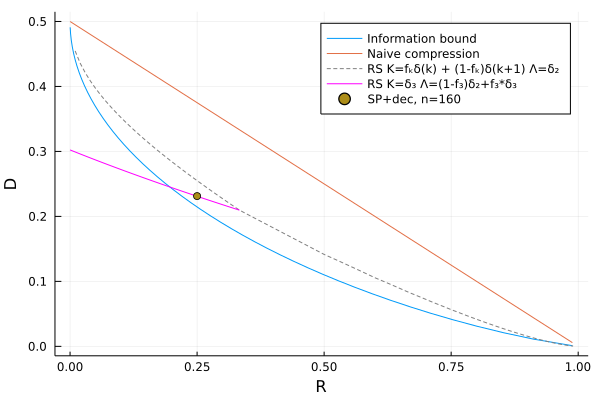

In [253]:
plot_rdb()
scatter!([R], [dist], label="SP+dec, n=$n")

In [ ]:
f1 = 0.01
f3s = 0.3:0.05:0.6
Rs = fill(NaN, eachindex(f3s))
D_sp_avg = fill(NaN, eachindex(f3s))
D_sp_std = fill(0.0, eachindex(f3s))
navg = 10
y = 0.5
n = 2100
K = OffsetVector([0,0,0,1], 0:3)
mK = sum(k*K[k] for k=eachindex(K))

for (i,f3) in pairs(f3s)
    println("--- degree $i of $(length(f3s)): f3 = $f3 ---")
    flush(stdout)
    Λ = OffsetVector([0,f1,1-f1-f3,f3], 0:3)
    mΛ = sum(d*Λ[d] for d=eachindex(Λ))
    α = mΛ/mK; Rs[i]=1-α
    # Single instance
    nedges = Int(round(n*sum(i*l for (i,l) in pairs(Λ)), digits=8))
    m = Int(nedges/3)
    dist = zeros(navg)
    for k in 1:navg
        println("Avg $k of $navg")
        Ht = ldpc_matrix(n, m, nedges, Λ, K)
        H = permutedims(Ht)
        B,indep = findbasis_slow(Array(H))
        x0 = bitrand(size(H,2))
        s = (-1) .^ x0
        init = OffsetArray(MVector{2J+1}(fill(0.0,2J+1)), -J:J)
        init[-1:1] .= 1/3
        sp = survey_propagation(H; field=copy(s), init=copy(init), y=y)
        decimate!(sp, indep; decsteps=1, callback=(x...)->false)
        mag = sign.(map(p->p'eachindex(p), sp.survey))
        x = mag .== -1
        w = sparse(B*x[indep] .% 2)
        println("Nunsat = ", sum(H*x .% 2))
        dist[k] = mean(w .!= x0)
    end
    D_sp_avg[i] = mean(dist)
    D_sp_std[i] = std(dist)/sqrt(navg)
end

--- degree 1 of 7: f3 = 0.3 ---
Avg 1 of 10
Nunsat = 2
Avg 2 of 10
Nunsat = 0
Avg 3 of 10
Nunsat = 0
Avg 4 of 10
Nunsat = 2
Avg 5 of 10
Nunsat = 3
Avg 6 of 10
Nunsat = 0
Avg 7 of 10
Nunsat = 15
Avg 8 of 10
Nunsat = 0
Avg 9 of 10
Nunsat = 1
Avg 10 of 10
Nunsat = 3
--- degree 2 of 7: f3 = 0.35 ---
Avg 1 of 10
Nunsat = 2
Avg 2 of 10
Nunsat = 15
Avg 3 of 10


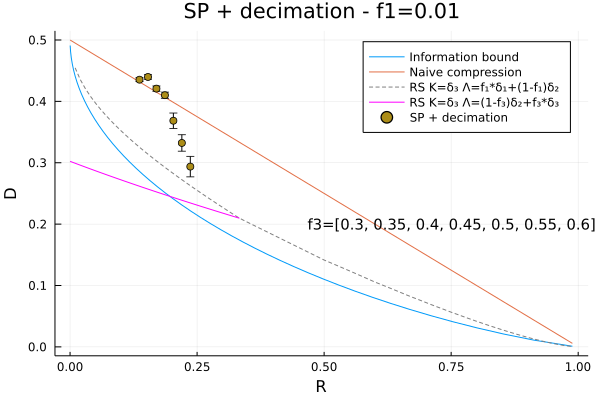

In [184]:
plot_rdb()
scatter!(Rs, D_sp_avg, yerr=D_sp_std, label="SP + decimation")
annotate!(0.75,0.2,Plots.text("f3="*string(collect(f3s)),10))
title!("SP + decimation - f1=$f1")

In [147]:
n = 2100
f1 = 0.01
f3 = 0.4
Λ = OffsetVector([0,f1,1-f1-f3,f3], 0:3)
K = OffsetVector([0,0,0,1], 0:3)
mK = sum(k*K[k] for k=eachindex(K))
mΛ = sum(d*Λ[d] for d=eachindex(Λ))
α = mΛ/mK; R = 1-α
# Single instance
nedges = Int(round(n*sum(i*l for (i,l) in pairs(Λ)), digits=8))
m = Int(nedges/3)
Ht = ldpc_matrix(n, m, nedges, Λ, K)
H = permutedims(Ht)
B,indep = findbasis(H, Ht)
x0 = bitrand(size(H,2))
s = (-1) .^ x0
init = OffsetArray(MVector{2J+1}(fill(0.0,2J+1)), -J:J)
init[-1:1] .= 1/3
sp = survey_propagation(H; field=copy(s), init, y=y);

In [148]:
decimate!(sp, indep; decsteps=1)

In [149]:
mag = sign.(map(p->p'eachindex(p), sp.survey))
x = mag .== -1
w = sparse(B*x[indep] .% 2);

In [150]:
dist = mean(w .!= x0)
R, dist

(0.20333333333333325, 0.2661904761904762)

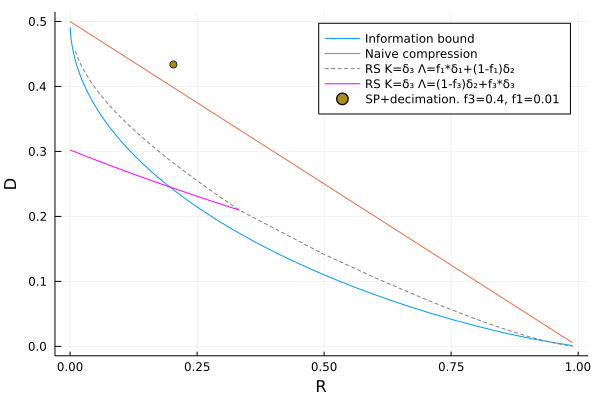

In [185]:
plot_rdb()
scatter!([R], [dist], label="SP+decimation. f3=$f3, f1=$f1")

In [219]:
function callback(t, ε, sp)
    t % 10 != 0 && return false
    mag = map(p->p'sign.(eachindex(p)), sp.survey)
    x = Vector(mag .< 0)
    x1 = (B*x[indep]) .% 2
    check = sum(H*x .%2)
    println("$t $check $(sum(x .!= x0)/length(x)) $(sum(x1 .!= x0)/length(x))")
    return check == 0
end
iteration!(sp, maxiter=100000, tol=1e-5, damp=0.2, rein=0.1, callback=callback)

10 281 0.202 0.2833333333333333
20 262 0.20477777777777778 0.27844444444444444
30 236 0.20666666666666667 0.2713333333333333
40 239 0.207 0.27444444444444444
50 215 0.20966666666666667 0.27155555555555555
60 207 0.21 0.27044444444444443
70 199 0.21166666666666667 0.2728888888888889
80 188 0.21244444444444444 0.2693333333333333
90 167 0.21266666666666667 0.27055555555555555
100 170 0.21222222222222223 0.27255555555555555
110 165 0.2127777777777778 0.2688888888888889
120 160 0.2137777777777778 0.2703333333333333
130 142 0.21555555555555556 0.26944444444444443
140 140 0.21544444444444444 0.2653333333333333
150 133 0.21644444444444444 0.2657777777777778
160 133 0.21755555555555556 0.2598888888888889
170 111 0.219 0.259
180 97 0.22022222222222224 0.25733333333333336
190 77 0.2212222222222222 0.25266666666666665
200 77 0.22155555555555556 0.24988888888888888
210 62 0.22233333333333333 0.247
220 73 0.222 0.24855555555555556
230 72 0.22211111111111112 0.2511111111111111
240 67 0.223 0.25111111

In [206]:
mag = map(p->p'eachindex(p), sp.survey);
x = Vector(mag .< 0)
xbase = B*(x[indep]) .% 2;

In [207]:
all(sign.(mag[indep]) == sign.(sp.efield[indep])) 

false

In [208]:
@show sum(x .!= x0)/length(xbase) 
@show sum(H*x .% 2)
@show sum(xbase .!= x0)/length(xbase)
@show sum(H*xbase .%2)/size(H,1)

sum(x .!= x0) / length(xbase) = 0.2058888888888889
sum((H * x) .% 2) = 235
sum(xbase .!= x0) / length(xbase) = 0.26766666666666666
sum((H * xbase) .% 2) / size(H, 1) = 0.0


0.0

In [209]:
sum(p[begin] for p in sp.survey)

2.2417460331495522e-69

In [128]:
[p[[-sp.J,sp.J]] for p in sp.survey[indep]]

2405-element Vector{Vector{Float64}}:
 [0.0, 1.0]
 [0.0, 1.0]
 [0.0, 1.0]
 [1.0, 0.0]
 [1.0, 0.0]
 [1.0, 0.0]
 [0.0, 1.0]
 [0.0, 1.0]
 [1.0, 0.0]
 [0.0, 1.0]
 [1.0, 0.0]
 [1.0, 0.0]
 [0.0, 1.0]
 ⋮
 [1.0, 0.0]
 [0.0, 1.0]
 [1.0, 0.0]
 [0.0, 1.0]
 [0.0, 1.0]
 [1.0, 0.0]
 [0.0, 1.0]
 [0.0, 1.0]
 [0.0, 1.0]
 [0.0, 1.0]
 [1.0, 0.0]
 [0.0, 1.0]

In [27]:
using ProgressMeter
callback(t,fg) = nothing;#println("$t $(fg.belief[1:4])")

nsamples = 10
fg = maxsum(H,  1 .- 2y .+ 1e-8*randn(N));

# the mapping is (0,1)=>(1,-1)
dist = map(1:nsamples) do i
    y = rand((0,1), N)
    fg.M .= 0
    fg.efield .= 1 .- 2y .+ 1e-8*randn(N)
    iteration!(fg; maxiter=2000, γ=1e-3, callback=callback)
    x = Int.(fg.belief .< 0)
    c = sum(fg.H'x .% 2)
    d = sum(x .⊻ y)/N
    @show d c
    x1 = B*x[indep] .% 2; d1 = sum(x1 .⊻ y)/N; c1 = sum(fg.H'x1 .% 2); @show d1 c1 
    d1
end
sum(dist)/nsamples

LoadError: UndefVarError: y not defined

In [28]:
1-M/N,sum(dist)/nsamples

LoadError: UndefVarError: dist not defined

In [29]:
x=[1:10;]; f=(x .% 2 .== 1);x[findall(f)]==x[f]

true

In [52]:
dist = map(1:10) do i
    Random.seed!(i)
    
    y = rand((0,1), N)

    lm = LossyModelGF2(fg, zeros(N), Inf, 1.0, y)
    
    function checker()
        v = (B*((fg.fields .< 0)[indep])) .% 2;
        dist = sum(v .⊻ y)/N
        check = sum(H*(fg.fields .< 0) .% 2)
        check, dist
    end

    independent = falses(N)
    independent[indep] .= true
    res_fg = solve!(lm, fg, randseed=1, verbose=true, showprogress=true, 
        independent=independent, basis = B)
#    res_fg = solve!(lm, fg, randseed=1, verbose=true, showprogress=true)
    avg_dist = res_fg.distortion 
    check, dist = checker()
    @show dist check avg_dist
    dist
end

Trial 1/1 100%|█████████████████████████████████████████| Time: 0:00:01


dist = 0.24287749287749288
check = 1
avg_dist = 0.4309116809116809


Trial 1/1 100%|█████████████████████████████████████████| Time: 0:00:01


dist = 0.24786324786324787
check = 1
avg_dist = 0.4309116809116809


Trial 1/1 100%|█████████████████████████████████████████| Time: 0:00:01


dist = 0.25427350427350426
check = 1
avg_dist = 0.4537037037037037


Trial 1/1 100%|█████████████████████████████████████████| Time: 0:00:01


dist = 0.26495726495726496
check = 5
avg_dist = 0.4565527065527066


Trial 1/1 100%|█████████████████████████████████████████| Time: 0:00:01


dist = 0.2378917378917379
check = 1
avg_dist = 0.42592592592592593


Trial 1/1 100%|█████████████████████████████████████████| Time: 0:00:01


dist = 0.26851851851851855
check = 4
avg_dist = 0.4423076923076923


Trial 1/1 100%|█████████████████████████████████████████| Time: 0:00:01


dist = 0.245014245014245
check = 6
avg_dist = 0.4458689458689459
dist = 0.24715099715099714
check = 0
avg_dist = 0.24715099715099714


Trial 1/1 100%|█████████████████████████████████████████| Time: 0:00:01


dist = 0.25427350427350426
check = 2
avg_dist = 0.44515669515669515
dist = 0.24857549857549857
check = 0
avg_dist = 0.24857549857549857


10-element Vector{Float64}:
 0.24287749287749288
 0.24786324786324787
 0.25427350427350426
 0.26495726495726496
 0.2378917378917379
 0.26851851851851855
 0.245014245014245
 0.24715099715099714
 0.25427350427350426
 0.24857549857549857

In [53]:
dev = sqrt(sum(dist.^2)/length(dist)-(sum(dist)/length(dist))^2)/sqrt(length(dist))
1-M/N, sum(dist)/length(dist)

(0.24002849002849003, 0.2511396011396011)